# Predicting Heart Disease using Machine Learning

This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine learning model capble of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical records of a patient can we predict whether or not they have heart disease ?

## 2. Data

The original data came from the cleavland data the UCI Machine Learning repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is a also a versio of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci


## 3. Evaluation

> If we can get 95% accuracy in predicting whether or not a patient has heart disease during out POC, we will pursue the project.

## 4. Features

This is where we will get different information about each of the features in our data.

**creaete data dictionary**

* age 
* sex 
* chest pain type (4 values) 
* resting blood pressure 
* serum cholestoral in mg/dl 
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina 
* oldpeak = ST depression induced by exercise relative to rest 
* the slope of the peak exercise ST segment 
* number of major vessels (0-3) colored by flourosopy 
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Preparing the tools

We're going to use pandas, matplotlib and numpy for our data analysis and manipulation

In [2]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want to plot out maps inside the notebook
%matplotlib inline 

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to know more about the data and become a subject matter expert on the dataset we are working with.

1. What questions are to trying to solve?
2. What kind of data do we have and how do you treat different types of data?
3. what are the missing items in data and how do we deal with that?
4. What are the outliers and why we should we care about them?
5. How can we add change or remove features so that we can get more of them?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# To find the number of classes

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

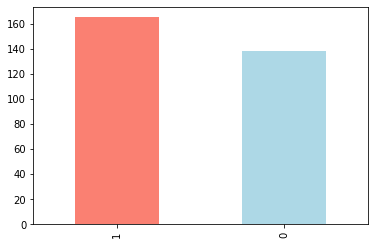

In [12]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Are they any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [17]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


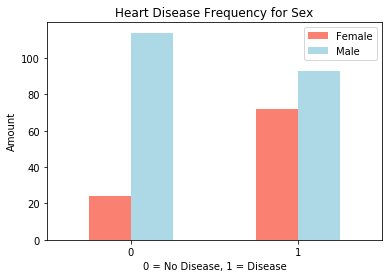

In [21]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Disease

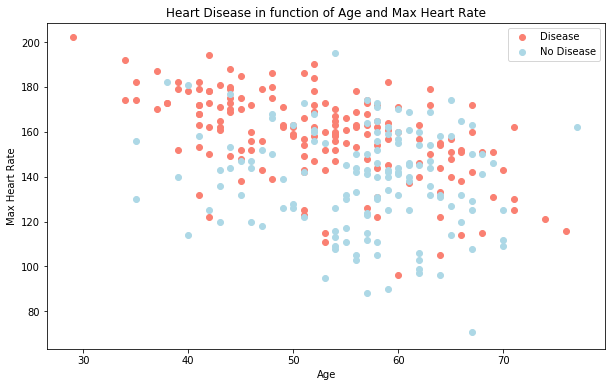

In [31]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

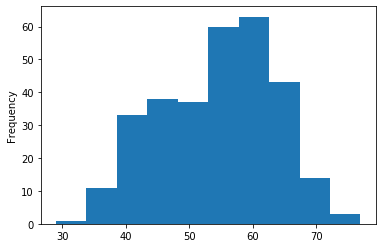

In [32]:
# Check the distribution of Age with histogram
df.age.plot.hist();

## Heart Disease based on Chest Pain type

In [40]:
# Compare target column with chest_pain type column
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


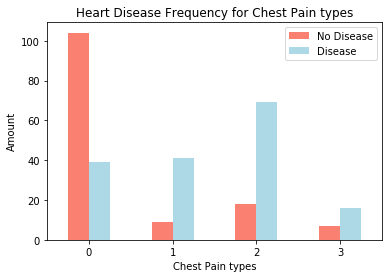

In [43]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["salmon", "lightblue"])
# Add some customization
plt.title("Heart Disease Frequency for Chest Pain types")
plt.xlabel("Chest Pain types")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"]);

In [44]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


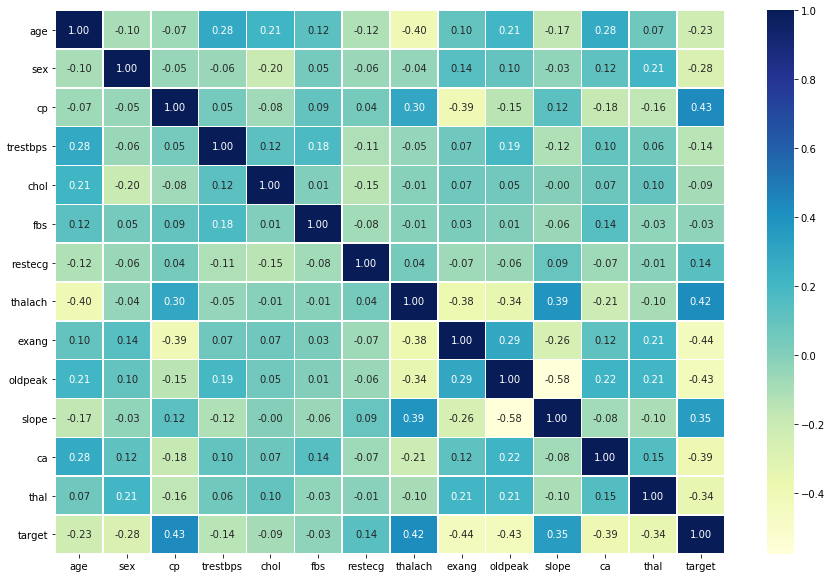

In [46]:
# Let's make our correlation matrix a more visual

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelling

In [47]:
# Split the data into X and y

X = df.drop("target", axis=1)
y = df["target"]

In [48]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [53]:
np.random.seed(42)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We're going to experiment with 3 regression models:
1. Logistic Regression
2. KNieghbours Classifier
3. Random Forest Classifier

In [63]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalutes given machine learning models.
    modles: A dictionary of different machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Setup random seed
    np.random.seed(42)
    # create to dictionary to store model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model with testing data
        model.fit(X_train, y_train)
        # Evaluate the model and append the score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [64]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

/Users/bharatkammakatla/ML-DS/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparision

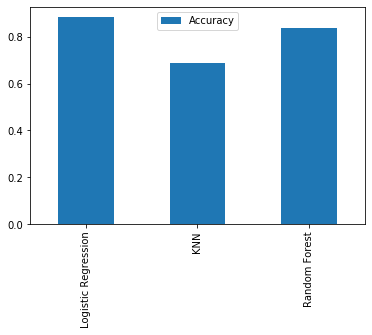

In [68]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot(kind="bar");

Now we have got a baseline model....

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* confusion matrix
* cross validation
* Precision
* Recall
* F1 score
* classification matrix
* ROC curve
* Area Under Curve (AUC)

## Hyperparameter tuning (by hand)

In [69]:
# Let's tune KNN

# train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21, 1)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different neighbors
for i in neighbors:
    # set the parameter
    knn.set_params(n_neighbors = i)
    # fit the test data
    knn.fit(X_train, y_train)
    # update the training score
    #train_scores.append(knn.score(X_train, y_train))
    # update the test score
    test_scores.append(knn.score(X_test, y_test))

In [70]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on test data: 75.41%


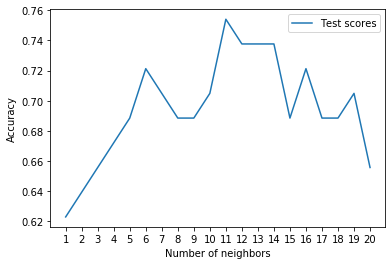

In [71]:
plt.plot(neighbors, test_scores, label="Test scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f"Max KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* Logistic Regression
* Random Forest Classifier

In [76]:
# Create a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for random forest
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we'hv got hyperparameter grids for both the models, let's tune them using RandomizedSearchCV...

In [77]:
# Tune Logistic Regression

np.random.seed(42)

# setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose=True)

# Fit random hyperparameter search for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [78]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [80]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we'hv tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [82]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit hyperparameter search for RandomForest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [84]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [85]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

Since our LogisticRegression model provided the best scores so far, we will try to fine tune it using GridSearchCV

In [87]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search to LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [88]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [89]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [90]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned machine learning classifier, beyond accuracy

* Precision
* Recall
* F1_score
* classification matrix
* ROC Curve
* AUC Curve

... and it would be great if cross validation is used wherever possible.

To make comparisions and evaluate our model, first we need to make predictions

In [91]:
y_preds = gs_log_reg.predict(X_test)

In [92]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

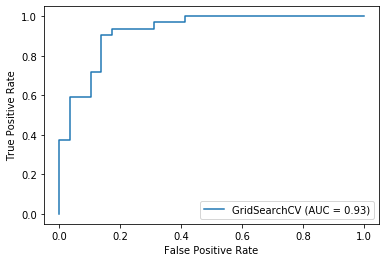

In [93]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [94]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


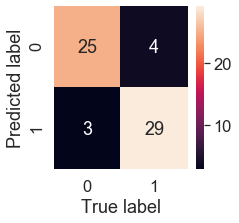

In [95]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds);

Now we'hv got a ROC curve and Confusion matrix, let's get a classification report aswell as cross-validated precision, recall, f1_score

In [96]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation score

we're going to calculate accuracy, precision, recall, f1_score of our model using cross-validation and in doing so we will be using `crossval_score`


In [98]:
# check best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [104]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [110]:
# Cross validated Accuracy
cv_acc = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy"))
cv_acc

0.8479781420765027

In [112]:
# Cross validated Precision
cv_pre = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision"))
cv_pre

0.8215873015873015

In [113]:
# Cross validated Recall
cv_recall = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall"))
cv_recall

0.9272727272727274

In [115]:
# Cross validated f1_score
cv_f1score = np.mean(cross_val_score(clf,
                                     X,
                                     y,
                                     cv=5,
                                     scoring="f1"))
cv_f1score

0.8705403543192143

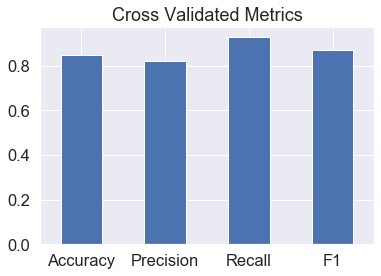

In [123]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_recall,
                           "F1": cv_f1score},
                           index=[0])

cv_metrics.T.plot(kind="bar", legend=False)
plt.title("Cross Validated Metrics")
plt.xticks(rotation=0);

### Feature Importance

It means which features contributed more to the model and how they contribute ?

Finding feature importance is different for each machine learning model. One way to find the feature importance is to search something like `<MODEL NAME> feature importance`



In [124]:
# Fit an instance of LogisticRegresssion
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [126]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [127]:
# Match co-ef's of features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003167276981166473,
 'sex': -0.8604461876496617,
 'cp': 0.6606705956924419,
 'trestbps': -0.011569931456373254,
 'chol': -0.0016637425660326452,
 'fbs': 0.04386123481563001,
 'restecg': 0.3127581278180605,
 'thalach': 0.02459361121787892,
 'exang': -0.6041306062021752,
 'oldpeak': -0.5686283181242949,
 'slope': 0.4505162370067001,
 'ca': -0.6360987949046014,
 'thal': -0.6766338344936489}

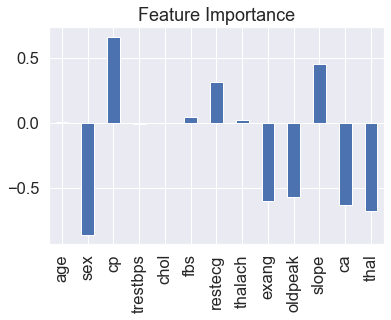

In [130]:
# Visualize feature importance
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [131]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [134]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [136]:
39/104, 41/9, 69/18, 16/7

(0.375, 4.555555555555555, 3.8333333333333335, 2.2857142857142856)

## 6. Experimentation

If you have'nt hit your evaluation metrics yet...ask yourself.....

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the existing the model? (other than what we have done so far)
* If your model is good enough(You have hit the evaluation metrics), how would you export it and share it to others?